In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv(r'C:\Users\vs\Downloads\Property_Price_Train.csv')
df1=pd.read_csv(r'C:\Users\vs\Downloads\Property_Price_Test.csv')

In [3]:
df

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
0        1              60          RLD        65.0      8450     Paved   
1        2              20          RLD        80.0      9600     Paved   
2        3              60          RLD        68.0     11250     Paved   
3        4              70          RLD        60.0      9550     Paved   
4        5              60          RLD        84.0     14260     Paved   
...    ...             ...          ...         ...       ...       ...   
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type  ... Pool_Area  \
0          NaN            Reg          Lvl       AllPub  ...         0   
1          NaN            Reg          Lvl       AllPub  ...         0   
2          NaN            IR1          Lvl       AllPub  ...         0   
3          NaN            IR1          Lvl       AllPub  ...         0   
4          NaN            IR1          Lvl       AllPub  ...         0   
...        ...            ...          ...          ...  ...       ...   
1454     Paved            Reg          Lvl       AllPub  ...         0   
1455       NaN            Reg          Lvl       AllPub  ...         0   
1456       NaN            Reg          Lvl       AllPub  ...         0   
1457       NaN            Reg          Lvl       AllPub  ...         0   
1458       NaN            Reg          Lvl       AllPub  ...         0   

     Pool_Quality Fence_Quality Miscellaneous_Feature Miscellaneous_Value  \
0             NaN           NaN                   NaN                   0   
1             NaN           NaN                   NaN                   0   
2             NaN           NaN                   NaN                   0   
3             NaN           NaN                   NaN                   0   
4             NaN           NaN                   NaN                   0   
...           ...           ...                   ...                 ...   
1454          NaN           NaN                   NaN                   0   
1455          NaN           NaN                   NaN                   0   
1456          NaN         MnPrv                   NaN                   0   
1457          NaN         GdPrv                  Shed                2500   
1458          NaN           NaN                   NaN                   0   

     Month_Sold Year_Sold  Sale_Type  Sale_Condition  Sale_Price  
0             2      2008         WD          Normal      208500  
1             5      2007         WD          Normal      181500  
2             9      2008         WD          Normal      223500  
3             2      2006         WD         Abnorml      140000  
4            12      2008         WD          Normal      250000  
...         ...       ...        ...             ...         ...  
1454         10      2009         WD          Normal      185000  
1455          8      2007         WD          Normal      175000  
1456          2      2010         WD          Normal      210000  
1457          5      2010         WD          Normal      266500  
1458          4      2010         WD          Normal      142125  

[1459 rows x 81 columns]

In [4]:
dfnew=df.drop(['Sale_Price'],axis=1)

In [5]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [6]:
a=dfnew.isnull().sum().sort_values(ascending=False)

<Axes: >

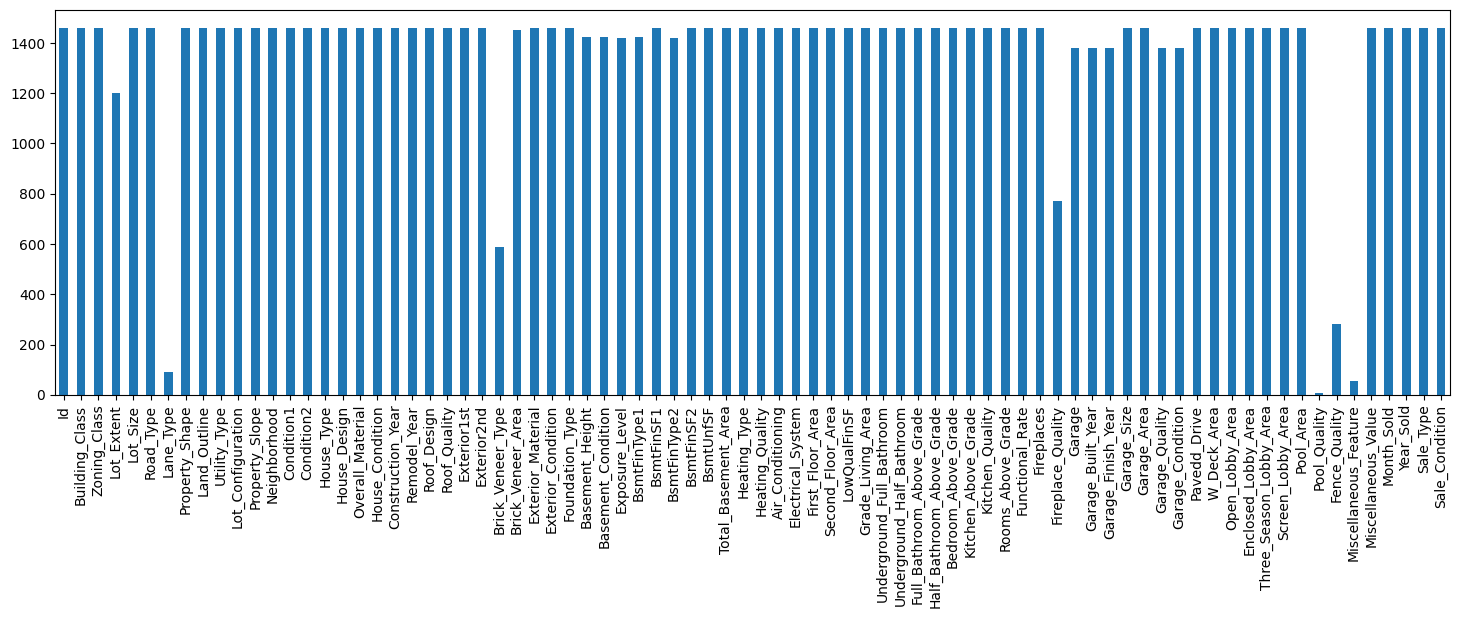

In [7]:
# Visualizing the null values in the data
plt.figure(figsize=(18,5))
dfnew.notnull().sum().plot(kind='bar')

In [8]:
dfnew.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1,inplace=True)

In [9]:
dfnew.describe()

Id  Building_Class   Lot_Extent       Lot_Size  \
count  1459.000000     1459.000000  1200.000000    1459.000000   
mean    730.000000       56.922550    70.045833   10517.225497   
std     421.321334       42.304033    24.294456    9984.675721   
min       1.000000       20.000000    21.000000    1300.000000   
25%     365.500000       20.000000    59.000000    7549.000000   
50%     730.000000       50.000000    69.000000    9477.000000   
75%    1094.500000       70.000000    80.000000   11603.000000   
max    1459.000000      190.000000   313.000000  215245.000000   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.100069         5.575051        1971.272104   1984.879369   
std            1.383171         1.113125          30.212814     20.645927   
min            1.000000         1.000000        1872.000000   1950.000000   
25%            5.000000         5.000000        1954.000000   1967.000000   
50%            6.000000         5.000000        1973.000000   1994.000000   
75%            7.000000         6.000000        2000.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1  ...  Garage_Area  W_Deck_Area  \
count         1451.00000  1459.000000  ...  1459.000000  1459.000000   
mean           103.75672   443.374914  ...   470.934787    93.015667   
std            181.10815   456.142186  ...   210.668787   124.796682   
min              0.00000     0.000000  ...  -129.369350  -338.112031   
25%              0.00000     0.000000  ...   329.290489     9.656026   
50%              0.00000   383.000000  ...   471.028116    92.803628   
75%            166.00000   712.000000  ...   607.184977   180.335986   
max           1600.00000  5644.000000  ...  1147.488093   572.298709   

       Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
count      1459.000000          1459.000000              1459.000000   
mean         47.811902            24.580227                 3.411926   
std          67.467586            61.353507                29.327247   
min        -187.149958          -164.807386                 0.000000   
25%           1.843186           -16.807302                 0.000000   
50%          46.837919            25.026953                 0.000000   
75%          96.523486            66.237591                 0.000000   
max         255.362547           225.762714               508.000000   

       Screen_Lobby_Area    Pool_Area  Miscellaneous_Value   Month_Sold  \
count        1459.000000  1459.000000          1459.000000  1459.000000   
mean           15.071282     2.760795            43.518849     6.322138   
std            55.775138    40.191018           496.291826     2.704540   
min             0.000000     0.000000             0.000000     1.000000   
25%             0.000000     0.000000             0.000000     5.000000   
50%             0.000000     0.000000             0.000000     6.000000   
75%             0.000000     0.000000             0.000000     8.000000   
max           480.000000   738.000000         15500.000000    12.000000   

         Year_Sold  
count  1459.000000  
mean   2007.815627  
std       1.328542  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

In [10]:
dfnew.drop(['Id','Pool_Area','Three_Season_Lobby_Area','Screen_Lobby_Area'],axis=1,inplace=True)

In [11]:
# divide data into categorical and numerical features
cat,num=[],[]
for i in dfnew.columns:
    d=dfnew.dtypes[i]
    if d=='float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)
print('Categorical:',cat)
print('Numerical:',num)

Categorical: ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']
Numerical: ['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area', 'Underground

In [12]:
for column in dfnew:
    if dfnew[column].isnull().any():
        if(column in cat):
            dfnew[column]=dfnew[column].fillna(dfnew[column].mode()[0])

In [13]:
a=dfnew.isnull().sum().sort_values(ascending=False)
a[a>0]

Lot_Extent           259
Garage_Built_Year     81
Brick_Veneer_Area      8
dtype: int64

In [14]:
dfnew['Garage_Built_Year'].replace(2207.0,2010.0,inplace=True)

In [15]:
dfnew['Brick_Veneer_Area'].fillna(dfnew['Brick_Veneer_Area'].mean(), inplace=True)
dfnew['Underground_Full_Bathroom'].fillna(dfnew['Underground_Full_Bathroom'].mean(), inplace=True)
dfnew['Underground_Half_Bathroom'].fillna(dfnew['Underground_Half_Bathroom'].mean(), inplace=True) #need to drop this and BsmtFinSF2 
dfnew['Garage_Size'].fillna(dfnew['Garage_Size'].mean(), inplace=True)
dfnew['Total_Basement_Area'].fillna(dfnew['Total_Basement_Area'].mean(), inplace=True)
dfnew['BsmtUnfSF'].fillna(dfnew['BsmtUnfSF'].mean(), inplace=True)
dfnew['BsmtFinSF1'].fillna(dfnew['BsmtFinSF1'].mean(), inplace=True)
dfnew['Garage_Area'].fillna(dfnew['Garage_Area'].mean(), inplace=True)

In [16]:
dfnew['Garage_Built_Year'].fillna(dfnew['Garage_Built_Year'].mode()[0], inplace=True)

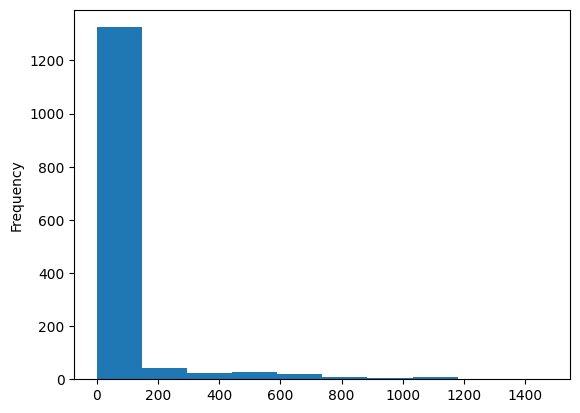

In [17]:
dfnew['BsmtFinSF2'].plot(kind='hist');

In [18]:
dfnew['Lot_Extent'].fillna(dfnew['Lot_Extent'].median(), inplace=True)

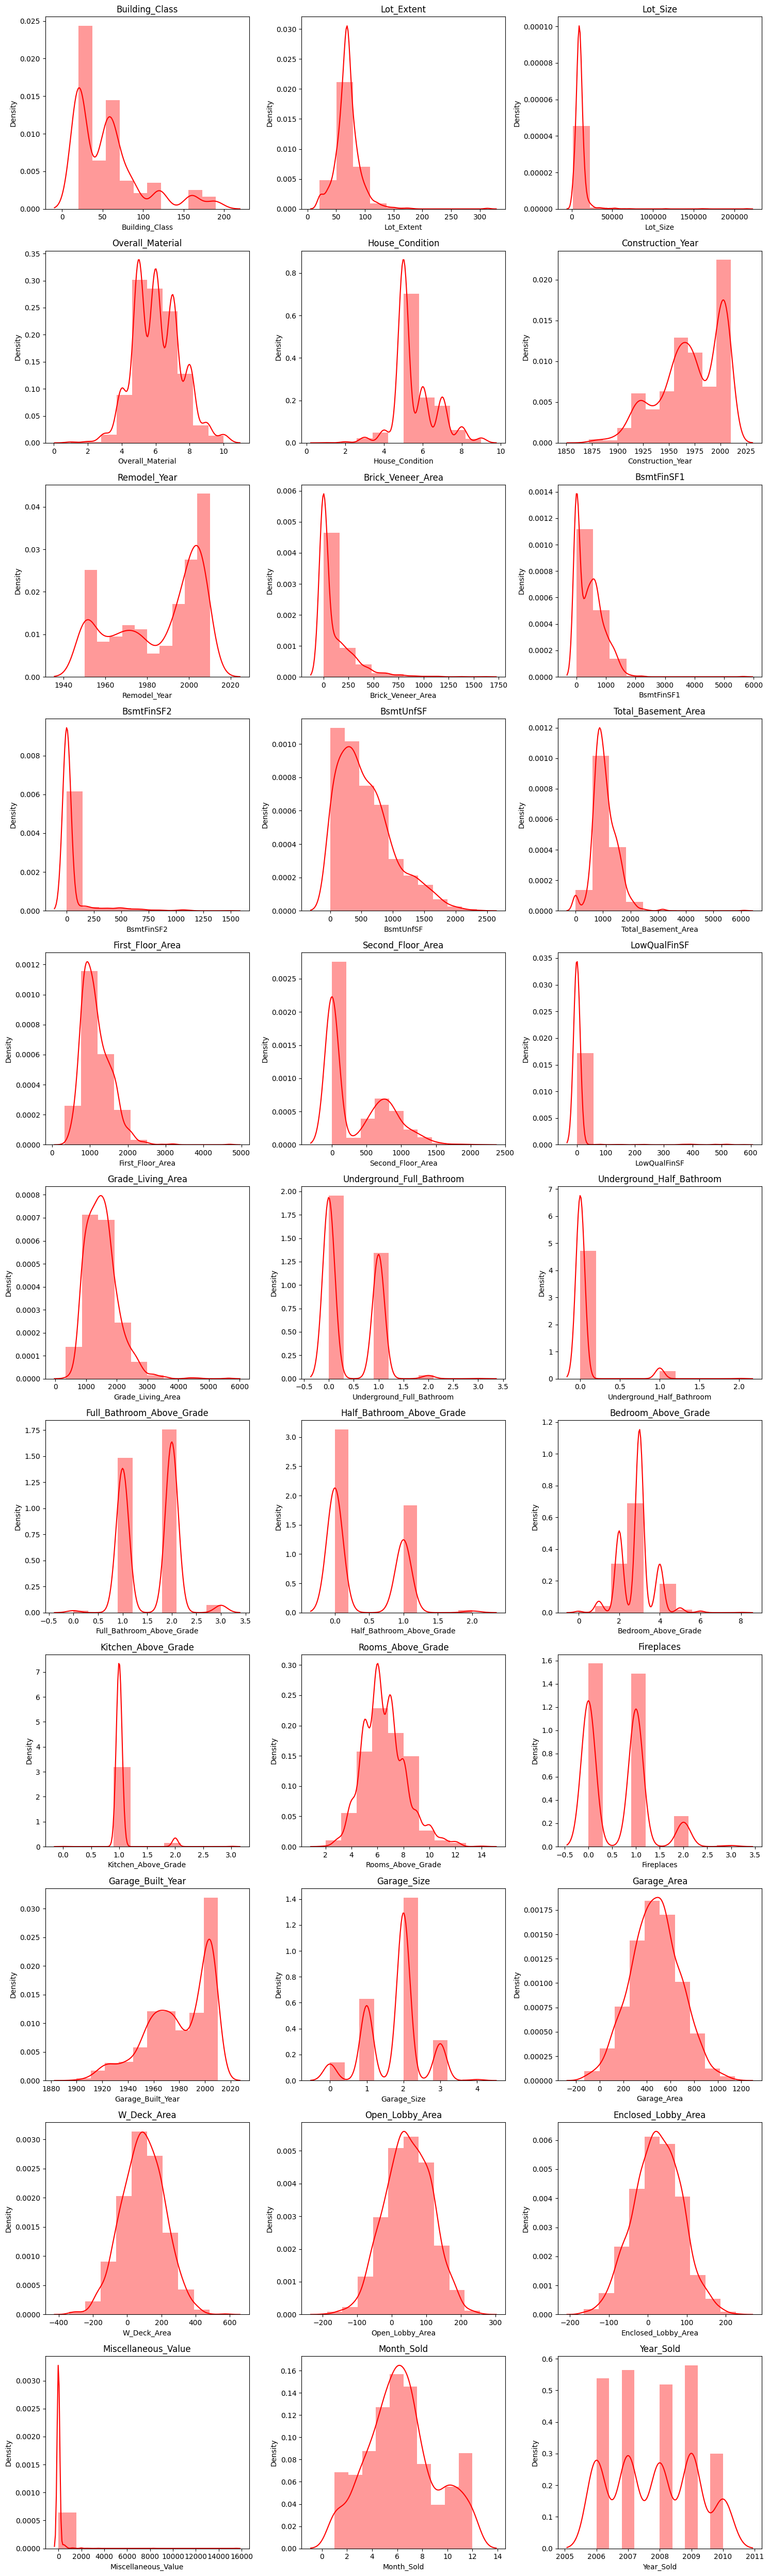

In [19]:
plt.figure(figsize=(15,50))
for i,variable in enumerate(num):
                    plt.subplot(11,3,i+1)

                    sns.distplot(dfnew[variable],kde=True,color='r',bins=10)
                    plt.tight_layout()
                    plt.title(variable)

In [20]:
for i in num:
    print(dfnew[i].value_counts().sort_values(ascending=False))
    print("*"*40)

Building_Class
20     535
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
****************************************
Lot_Extent
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64
****************************************
Lot_Size
7200     25
9600     24
6000     17
8400     14
10800    14
         ..
10920     1
10652     1
12968     1
11924     1
14260     1
Name: count, Length: 1073, dtype: int64
****************************************
Overall_Material
5     396
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
****************************************
House_Condition
5    821
6    251
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dty

Columns: \
Underground half bathroom\
Miscellaneous_Values\
LowQualFinSF\
BsmntFinSF2\
Kitchen_Above_Grade have high repeating values therefore dropping them

In [21]:
dfnew.drop(['Underground_Half_Bathroom','Miscellaneous_Value','LowQualFinSF','BsmtFinSF2','Kitchen_Above_Grade'],axis=1,inplace=True)

In [22]:
def set_capping(df,column,capping):
    mean=df[column].mean()
    std=df[column].std()

    UCL=mean+(3*std)
    LCL=mean-(3*std)
    if capping=="both":
        df[column]=np.where((df[column]>UCL),UCL,df[column])
        df[column]=np.where((df[column]<LCL),LCL,df[column])
    elif capping=="upper":
        df[column]=np.where((df[column]>UCL),UCL,df[column])
    elif caping =="lower":
        df[column]=np.where((df[column]<LCL),LCL,df[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")

<Axes: ylabel='Frequency'>

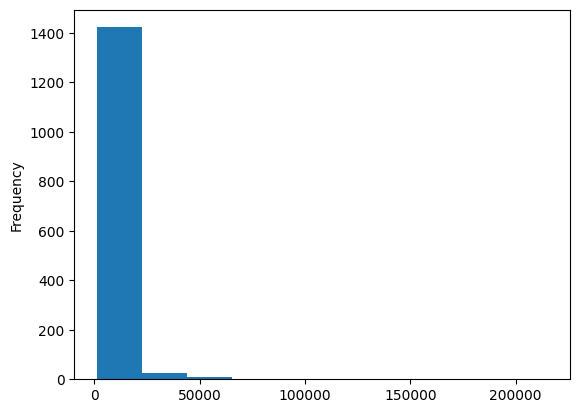

In [23]:
dfnew['Lot_Size'].plot(kind='hist')

In [24]:
dfnew['Lot_Size'] = np.log(dfnew['Lot_Size']+1)

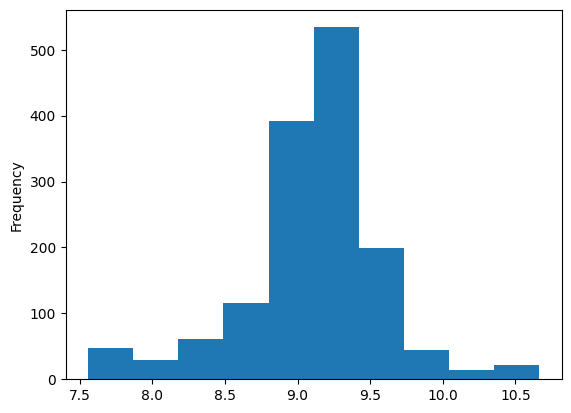

In [25]:
set_capping(dfnew,'Lot_Size','both')
dfnew['Lot_Size'].plot(kind='hist');

In [26]:
dfnew['Lot_Size'].describe()
#need to figure out a way to replace negative values as lot size cannot be negative

count    1459.000000
mean        9.107942
std         0.489462
min         7.558281
25%         8.929302
50%         9.156729
75%         9.359105
max        10.663524
Name: Lot_Size, dtype: float64

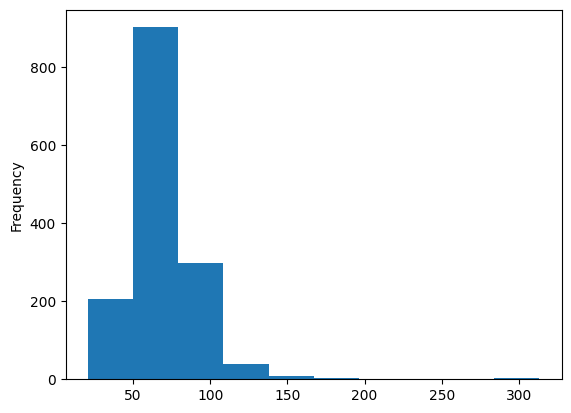

In [27]:
dfnew['Lot_Extent'].plot(kind='hist');

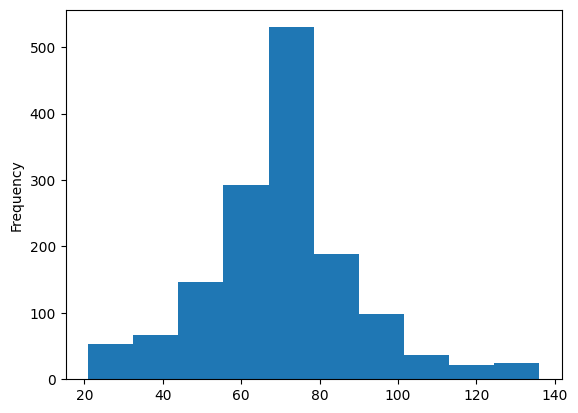

In [28]:
set_capping(dfnew,'Lot_Extent','upper')
dfnew['Lot_Extent'].plot(kind='hist');

In [29]:
dfnew['Lot_Extent'].describe()

count    1459.000000
mean       69.440325
std        19.533979
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       135.964635
Name: Lot_Extent, dtype: float64

<Axes: ylabel='Frequency'>

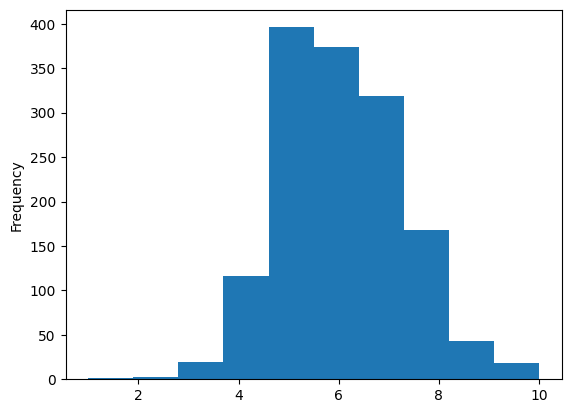

In [30]:
dfnew['Overall_Material'].plot(kind='hist')

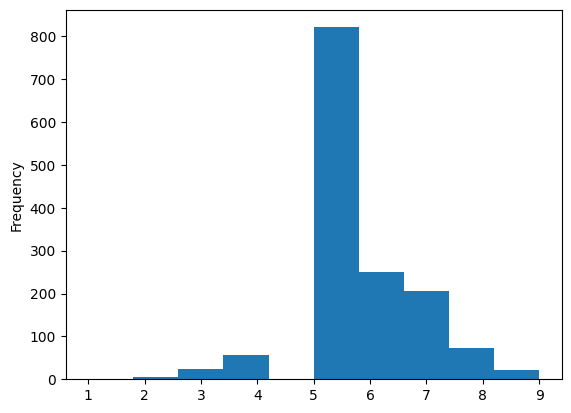

In [31]:
dfnew['House_Condition'].plot(kind='hist');

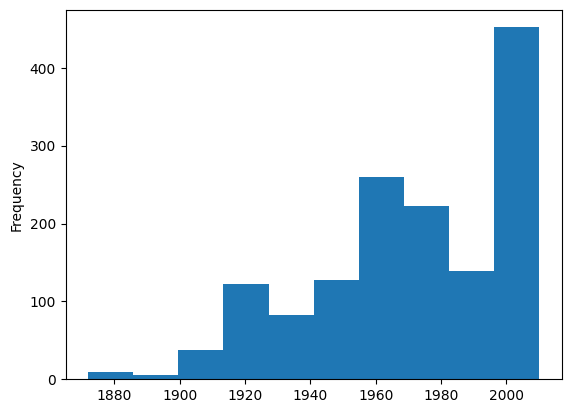

In [32]:
dfnew['Construction_Year'].plot(kind='hist');

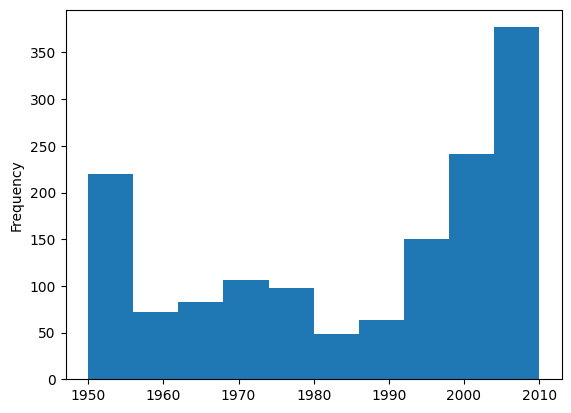

In [33]:
dfnew['Remodel_Year'].plot(kind='hist');

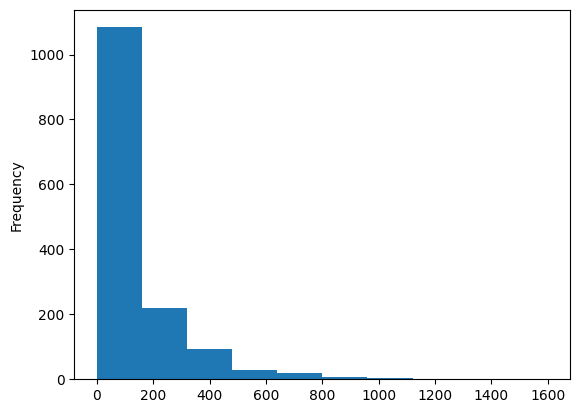

In [34]:
dfnew['Brick_Veneer_Area'].plot(kind='hist');

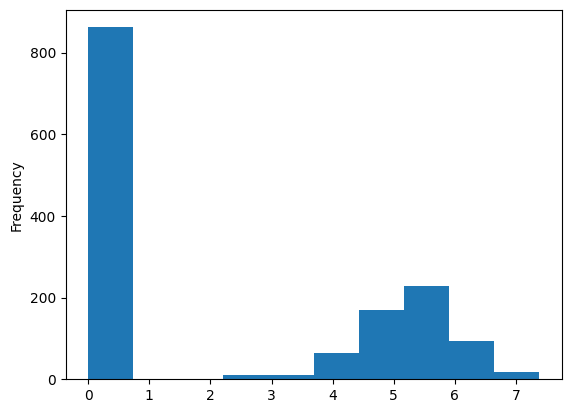

In [35]:
dfnew['Brick_Veneer_Area'] = np.log(dfnew['Brick_Veneer_Area']+1)
dfnew['Brick_Veneer_Area'].plot(kind='hist');

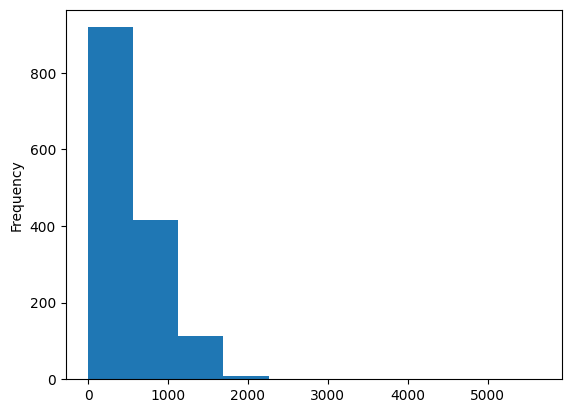

In [36]:
dfnew['BsmtFinSF1'].plot(kind='hist');

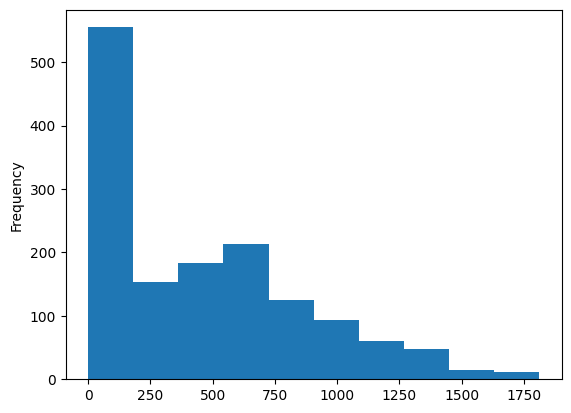

In [37]:
set_capping( dfnew, 'BsmtFinSF1', 'upper')
dfnew['BsmtFinSF1'].plot(kind='hist');

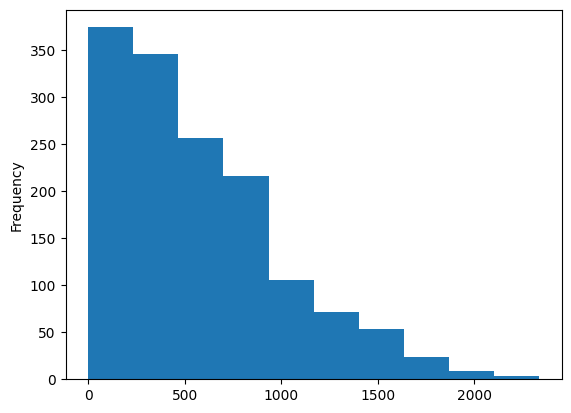

In [38]:
dfnew['BsmtUnfSF'].plot(kind='hist');

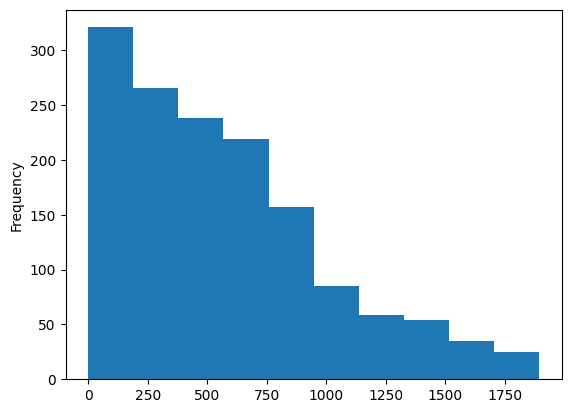

In [39]:
set_capping( dfnew, 'BsmtUnfSF', 'upper')
dfnew['BsmtUnfSF'].plot(kind='hist');

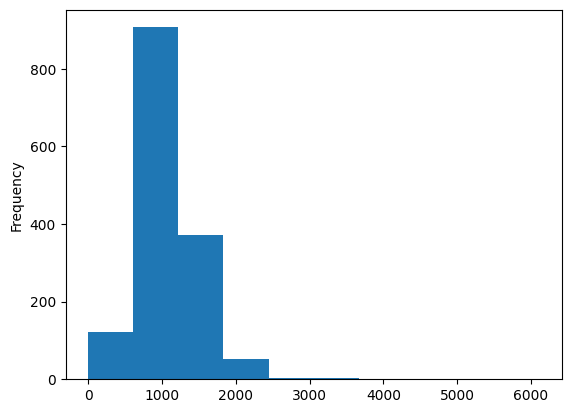

In [40]:
dfnew['Total_Basement_Area'].plot(kind='hist');

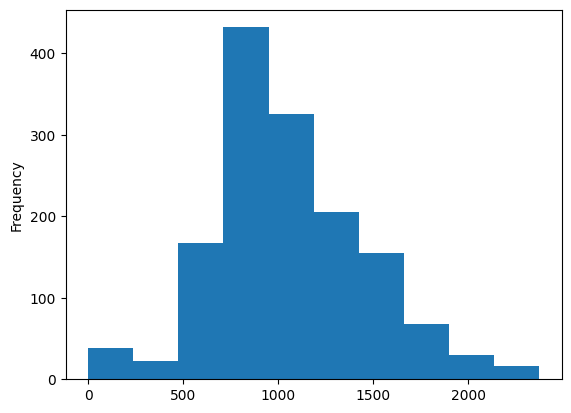

In [41]:
set_capping( dfnew, 'Total_Basement_Area', 'upper')
dfnew['Total_Basement_Area'].plot(kind='hist');

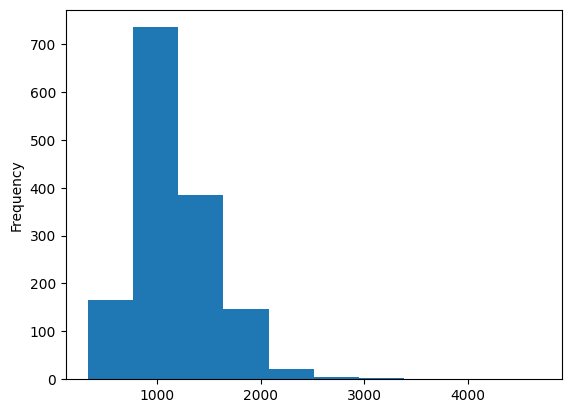

In [42]:
dfnew['First_Floor_Area'].plot(kind='hist');

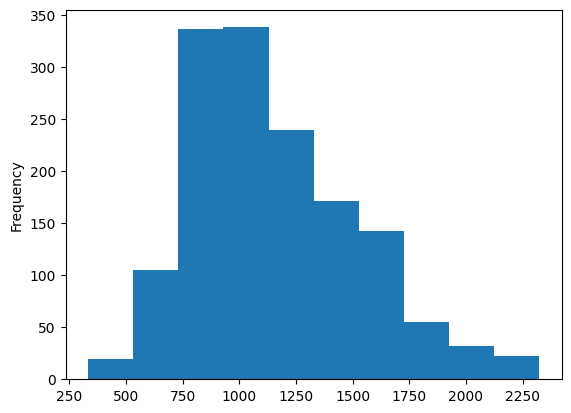

In [43]:
set_capping( dfnew, 'First_Floor_Area', 'upper')
dfnew['First_Floor_Area'].plot(kind='hist');

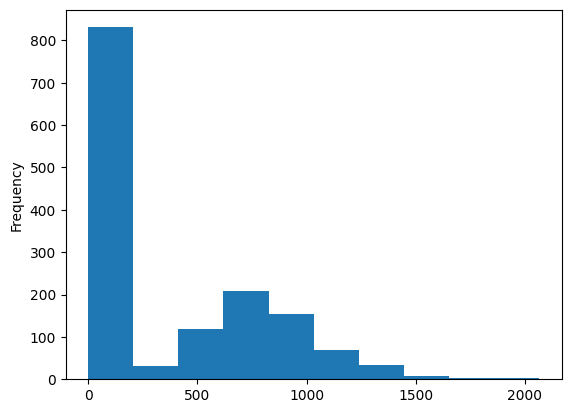

In [44]:
dfnew['Second_Floor_Area'].plot(kind='hist');

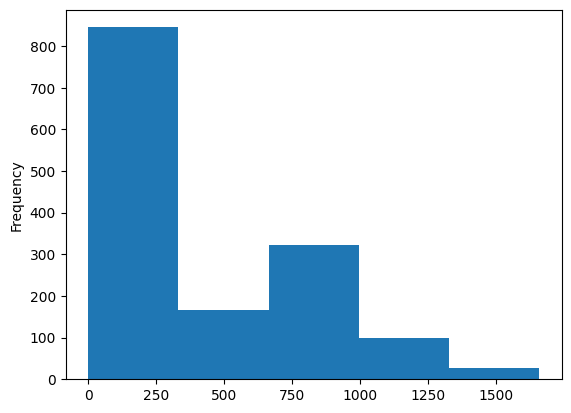

In [45]:
set_capping( dfnew, 'Second_Floor_Area', 'upper')
dfnew['Second_Floor_Area'].plot(kind='hist', bins=5);

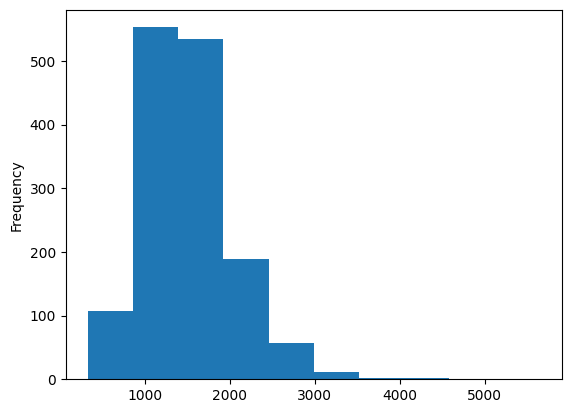

In [46]:
dfnew['Grade_Living_Area'].plot(kind='hist');

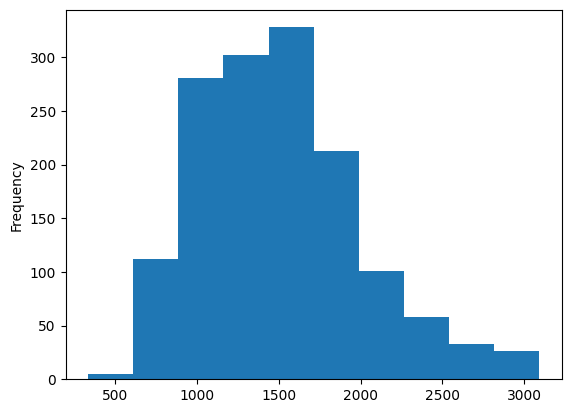

In [47]:
set_capping( dfnew, 'Grade_Living_Area', 'upper')
dfnew['Grade_Living_Area'].plot(kind='hist');

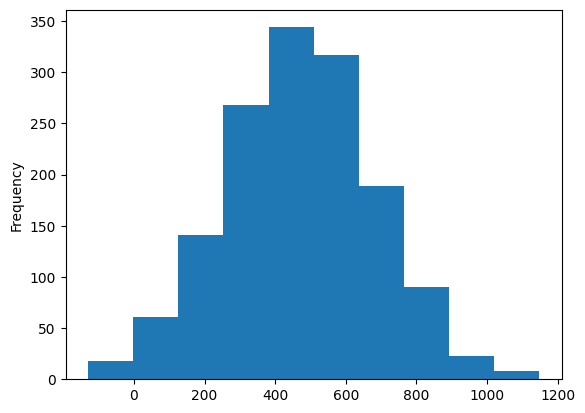

In [48]:
dfnew['Garage_Area'].plot(kind='hist');

In [49]:
dfnew['Garage_Area'][dfnew['Garage_Area']<0]=0

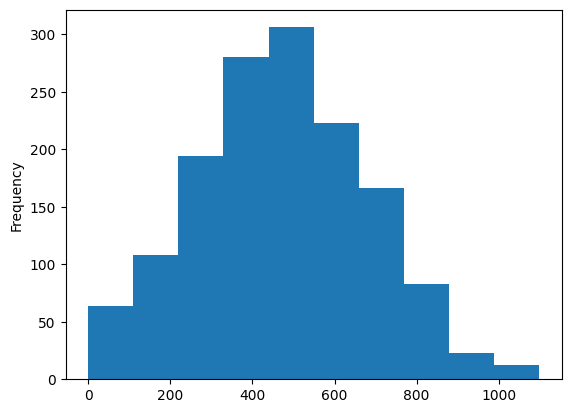

In [50]:
set_capping( dfnew, 'Garage_Area', 'upper')
dfnew['Garage_Area'].plot(kind='hist');

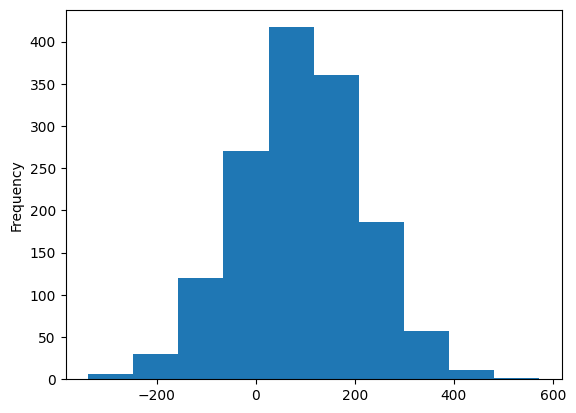

In [51]:
dfnew['W_Deck_Area'].plot(kind='hist');

In [52]:
dfnew['W_Deck_Area'][dfnew['W_Deck_Area']<0]= abs(dfnew['W_Deck_Area'])

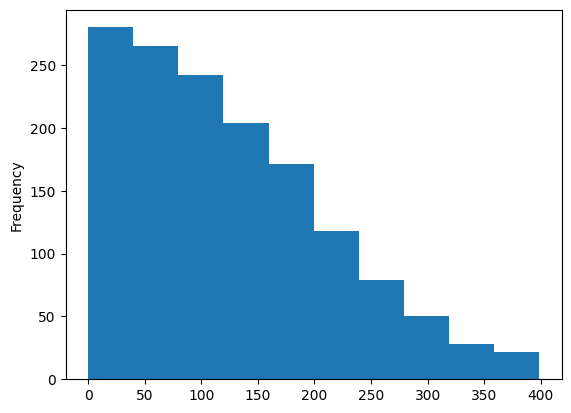

In [53]:
set_capping( dfnew, 'W_Deck_Area', 'upper')
dfnew['W_Deck_Area'].plot(kind='hist');

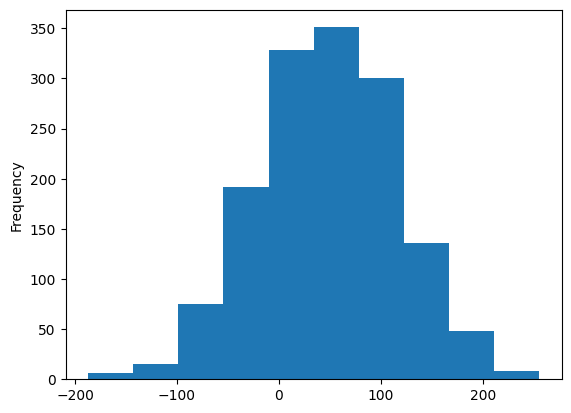

In [54]:
dfnew['Open_Lobby_Area'].plot(kind='hist');

In [55]:
dfnew['Open_Lobby_Area'][dfnew['Open_Lobby_Area']<0]= abs(dfnew['Open_Lobby_Area'])

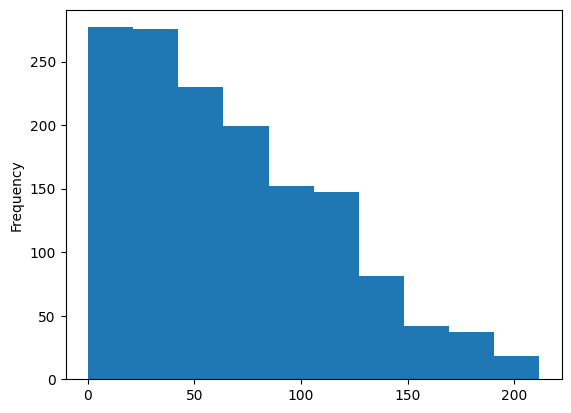

In [56]:
set_capping( dfnew, 'Open_Lobby_Area', 'upper')
dfnew['Open_Lobby_Area'].plot(kind='hist');

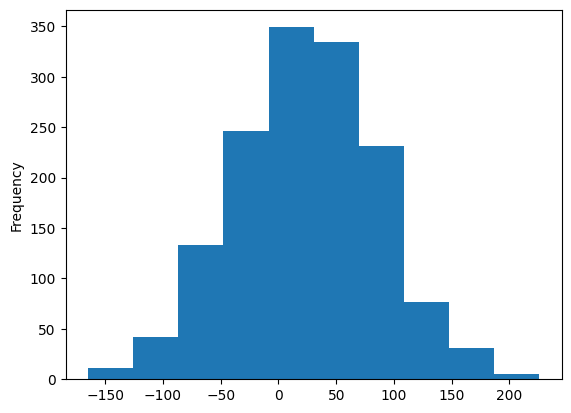

In [57]:
dfnew['Enclosed_Lobby_Area'].plot(kind='hist');

In [58]:
dfnew['Enclosed_Lobby_Area'][dfnew['Enclosed_Lobby_Area']<0]= abs(dfnew['Enclosed_Lobby_Area'])

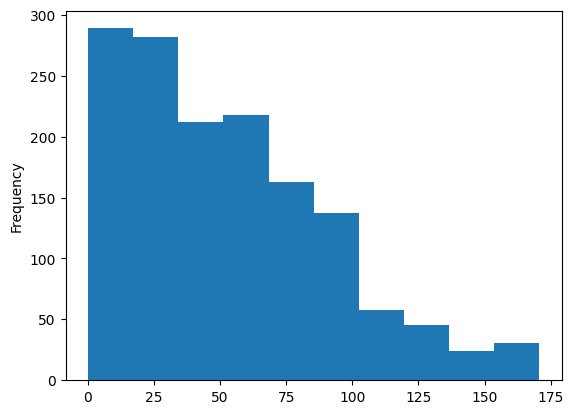

In [59]:
set_capping( dfnew, 'Enclosed_Lobby_Area', 'upper')
dfnew['Enclosed_Lobby_Area'].plot(kind='hist');

In [60]:
# divide data into categorical and numerical features
cat, num = [], []
for i in dfnew.columns:
    d = dfnew.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']
Numerical:  ['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Full_Bathr

In [61]:
from scipy import stats

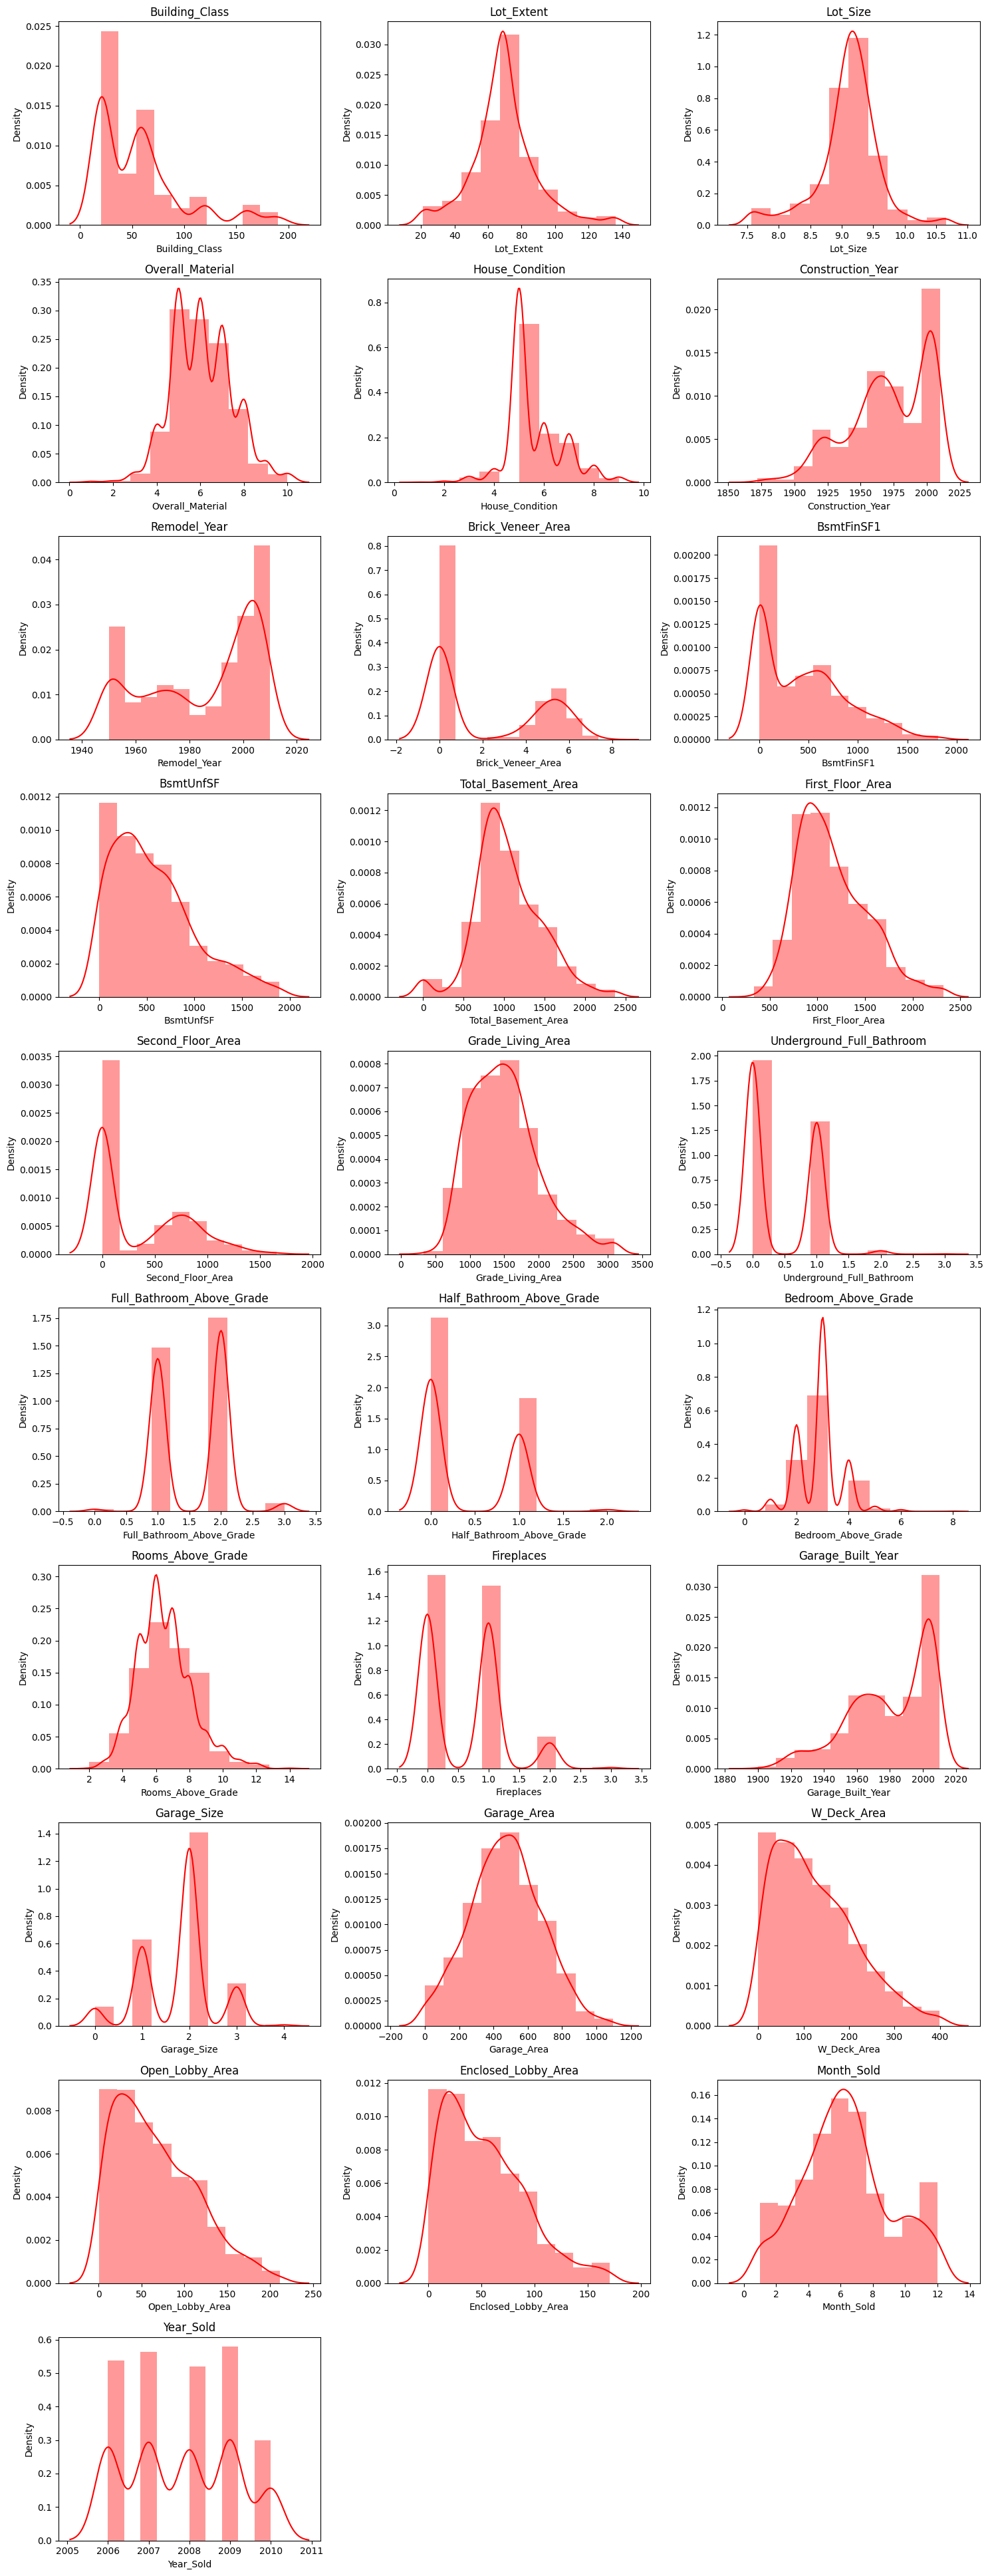

In [62]:
plt.figure(figsize=(15,50))
for i, variable in enumerate(num):
                     plt.subplot(13,3,i+1)
                       
                     sns.distplot(dfnew[variable],kde=True,color='r', bins=10)
                     plt.tight_layout()
                     plt.title(variable)

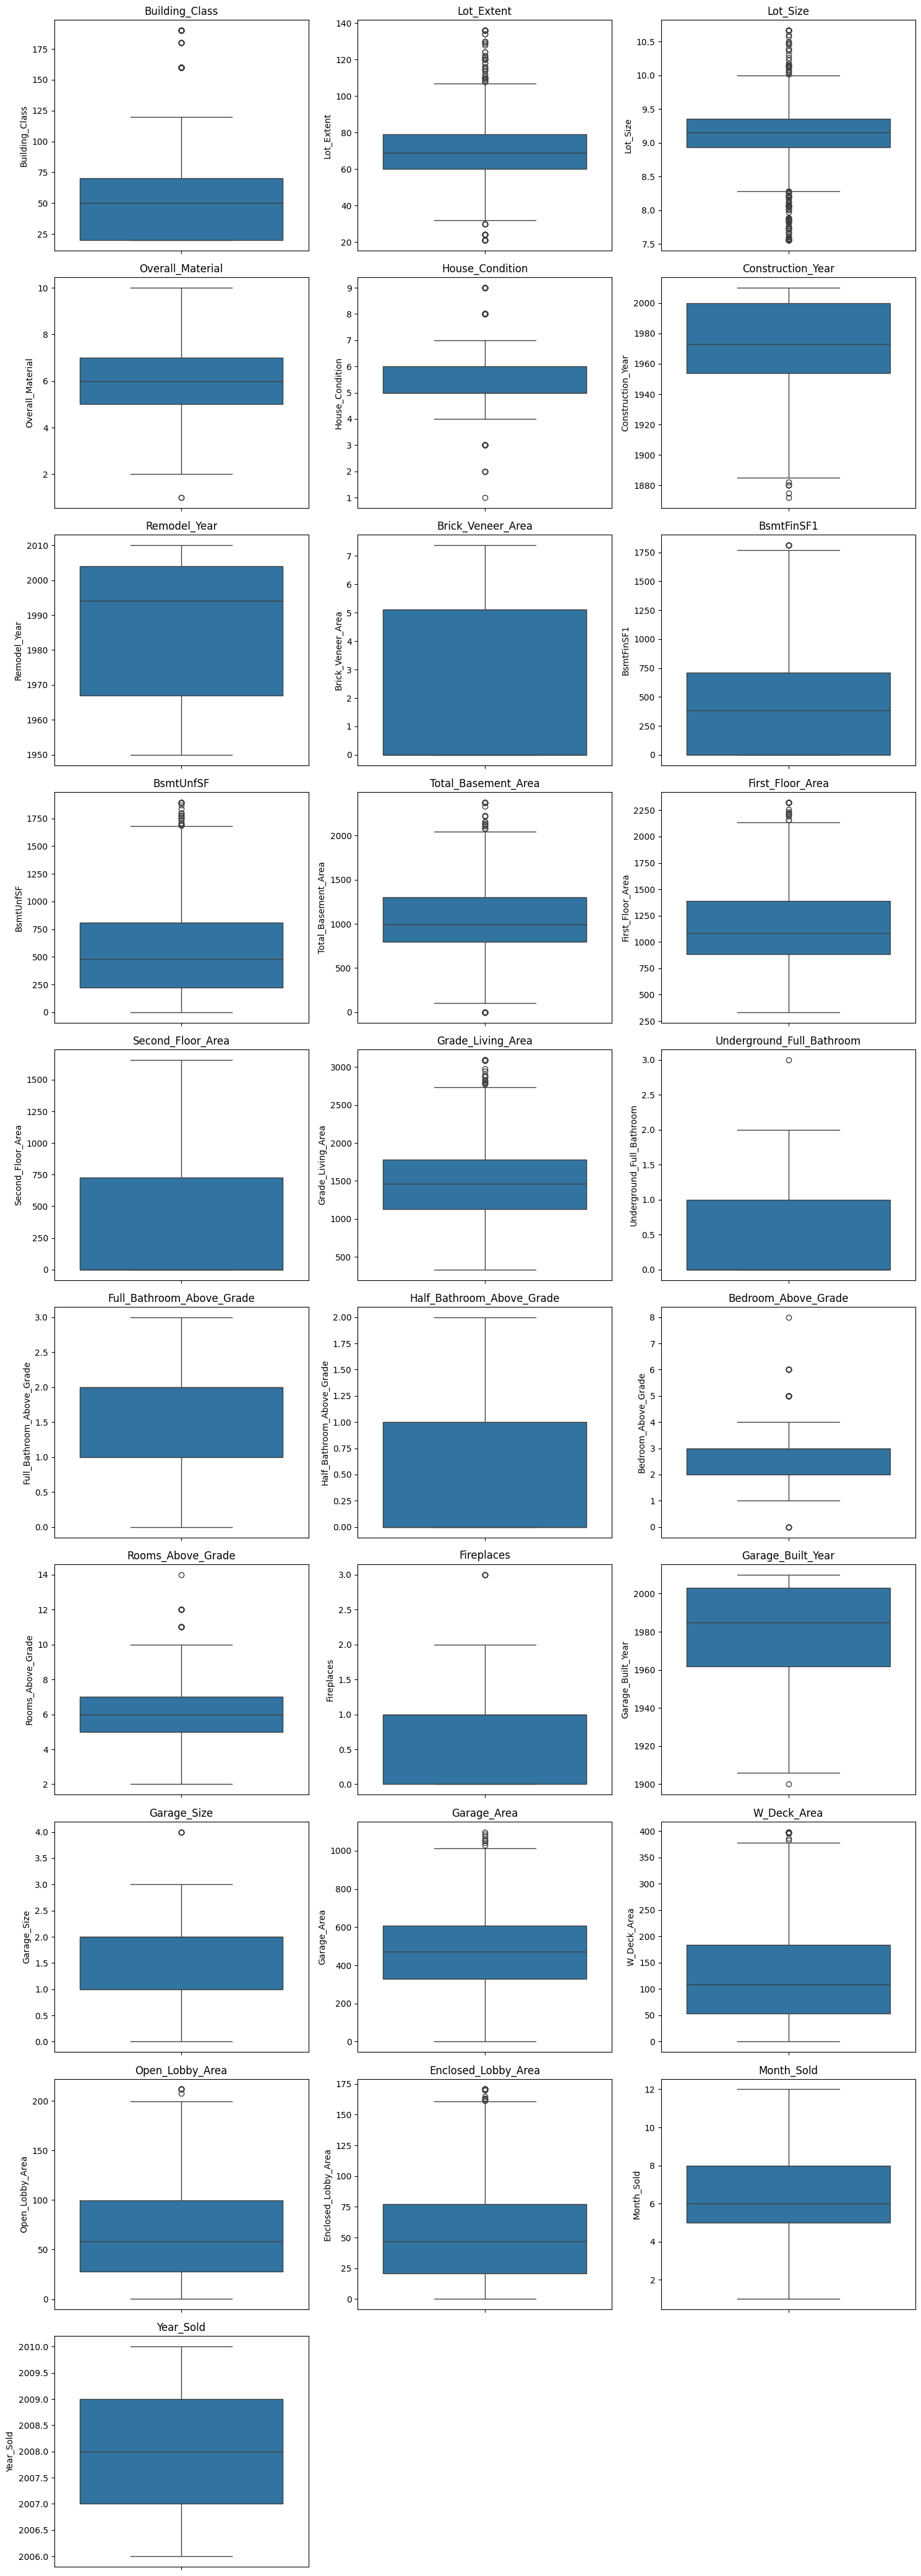

In [63]:
plt.figure(figsize=(15,50))
for i, variable in enumerate(num):
                     plt.subplot(12,3,i+1)
                       
                     sns.boxplot(dfnew[variable])
                     plt.tight_layout()
                     plt.title(variable)

# Categorical Features

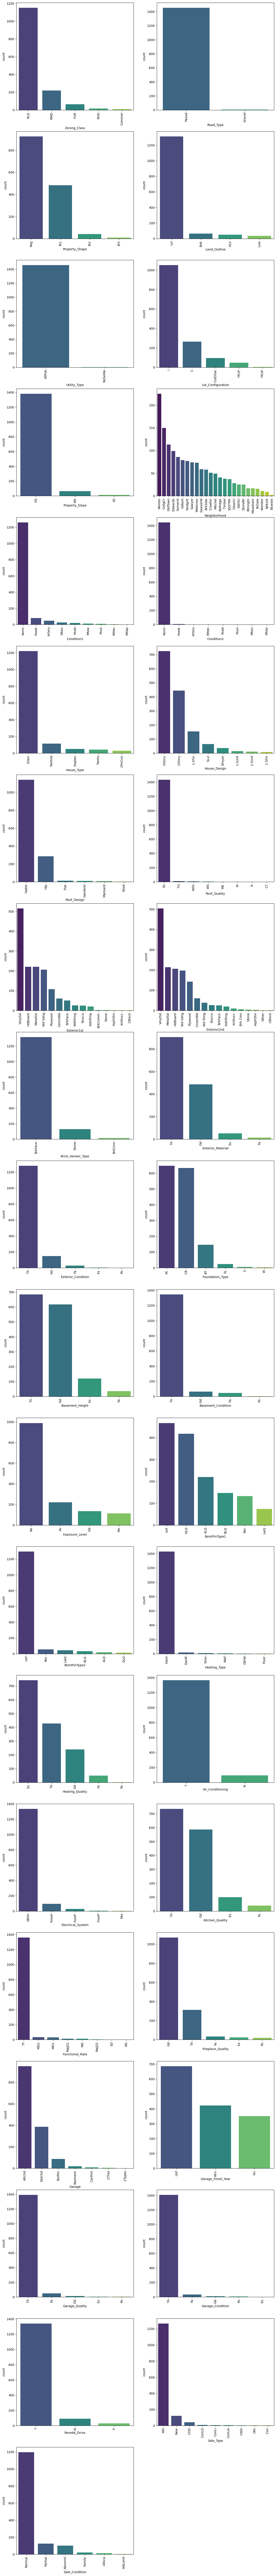

In [64]:
plt.figure(figsize=(15,300))

for i, cols in enumerate(cat):
                     plt.subplot(40,2,i+1)
                     order = dfnew[cols].value_counts(ascending=False).index    
                     ax=sns.countplot(x=dfnew[cols], data=dfnew , order=order ,palette='viridis')
                     plt.xticks(rotation=90)
                     plt.tight_layout

Zoning class looks like a good predictor of price and there is low overlap between the price.\
Road type has just 12 samples for Gravel so it cannot be used.\
Property shape also has significant overlap thus cannot be used as a predictor.\
Land outline can be used as a predictor.\
Utility type cannot be used as a predictor.\
Lot Configuration also has signficant overlap therefore cannot be used.\
Property slope also has overlap cannot be used.\
Neighbourhood looks like a good predictor of price.\
Brick veneer type and exterior material look like a good predictor of price.\
Basement height, basement condition and exposure level look like possible predictor of price.\
Air condition and kitchen quality look like good predictor of price.\
Garage finish year looks like a possible predictor of price.

In [65]:
for i in cat:
    print(dfnew[i].value_counts().sort_values(ascending=False))
    print("*"*40)

Zoning_Class
RLD       1150
RMD        218
FVR         65
RHD         16
Commer      10
Name: count, dtype: int64
****************************************
Road_Type
Paved     1453
Gravel       6
Name: count, dtype: int64
****************************************
Property_Shape
Reg    924
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
****************************************
Land_Outline
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
****************************************
Utility_Type
AllPub    1458
NoSeWa       1
Name: count, dtype: int64
****************************************
Lot_Configuration
I          1051
C           263
CulDSac      94
FR2P         47
FR3P          4
Name: count, dtype: int64
****************************************
Property_Slope
GS    1381
MS      65
SS      13
Name: count, dtype: int64
****************************************
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilber

In [66]:
dfnew.shape

(1459, 67)

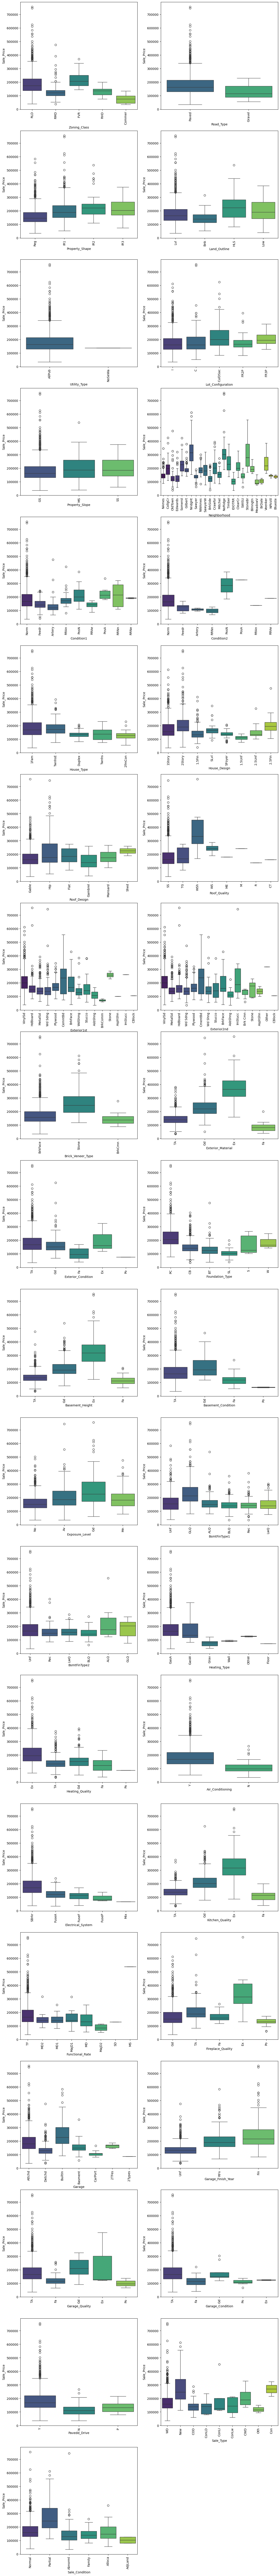

In [67]:
plt.figure(figsize=(15,300))

for i, cols in enumerate(cat):
                     plt.subplot(40,2,i+1)
                     order = dfnew[cols].value_counts(ascending=False).index    
                     ax=sns.boxplot(x=dfnew[cols], y=df['Sale_Price'], data=dfnew , order=order ,palette='viridis')
                     plt.xticks(rotation=90)
                     plt.tight_layout

In [68]:
target = df['Sale_Price'].reset_index()

In [69]:
target = target.iloc[:,1:]

In [70]:
dfnew.reset_index(inplace=True)

In [71]:
df_new = dfnew.iloc[:,1:]

In [72]:
final_train = df_new.join(target)

In [73]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   float64
 4   Road_Type                  1459 non-null   object 
 5   Property_Shape             1459 non-null   object 
 6   Land_Outline               1459 non-null   object 
 7   Utility_Type               1459 non-null   object 
 8   Lot_Configuration          1459 non-null   object 
 9   Property_Slope             1459 non-null   object 
 10  Neighborhood               1459 non-null   object 
 11  Condition1                 1459 non-null   object 
 12  Condition2                 1459 non-null   object 
 13  House_Type                 1459 non-null   objec

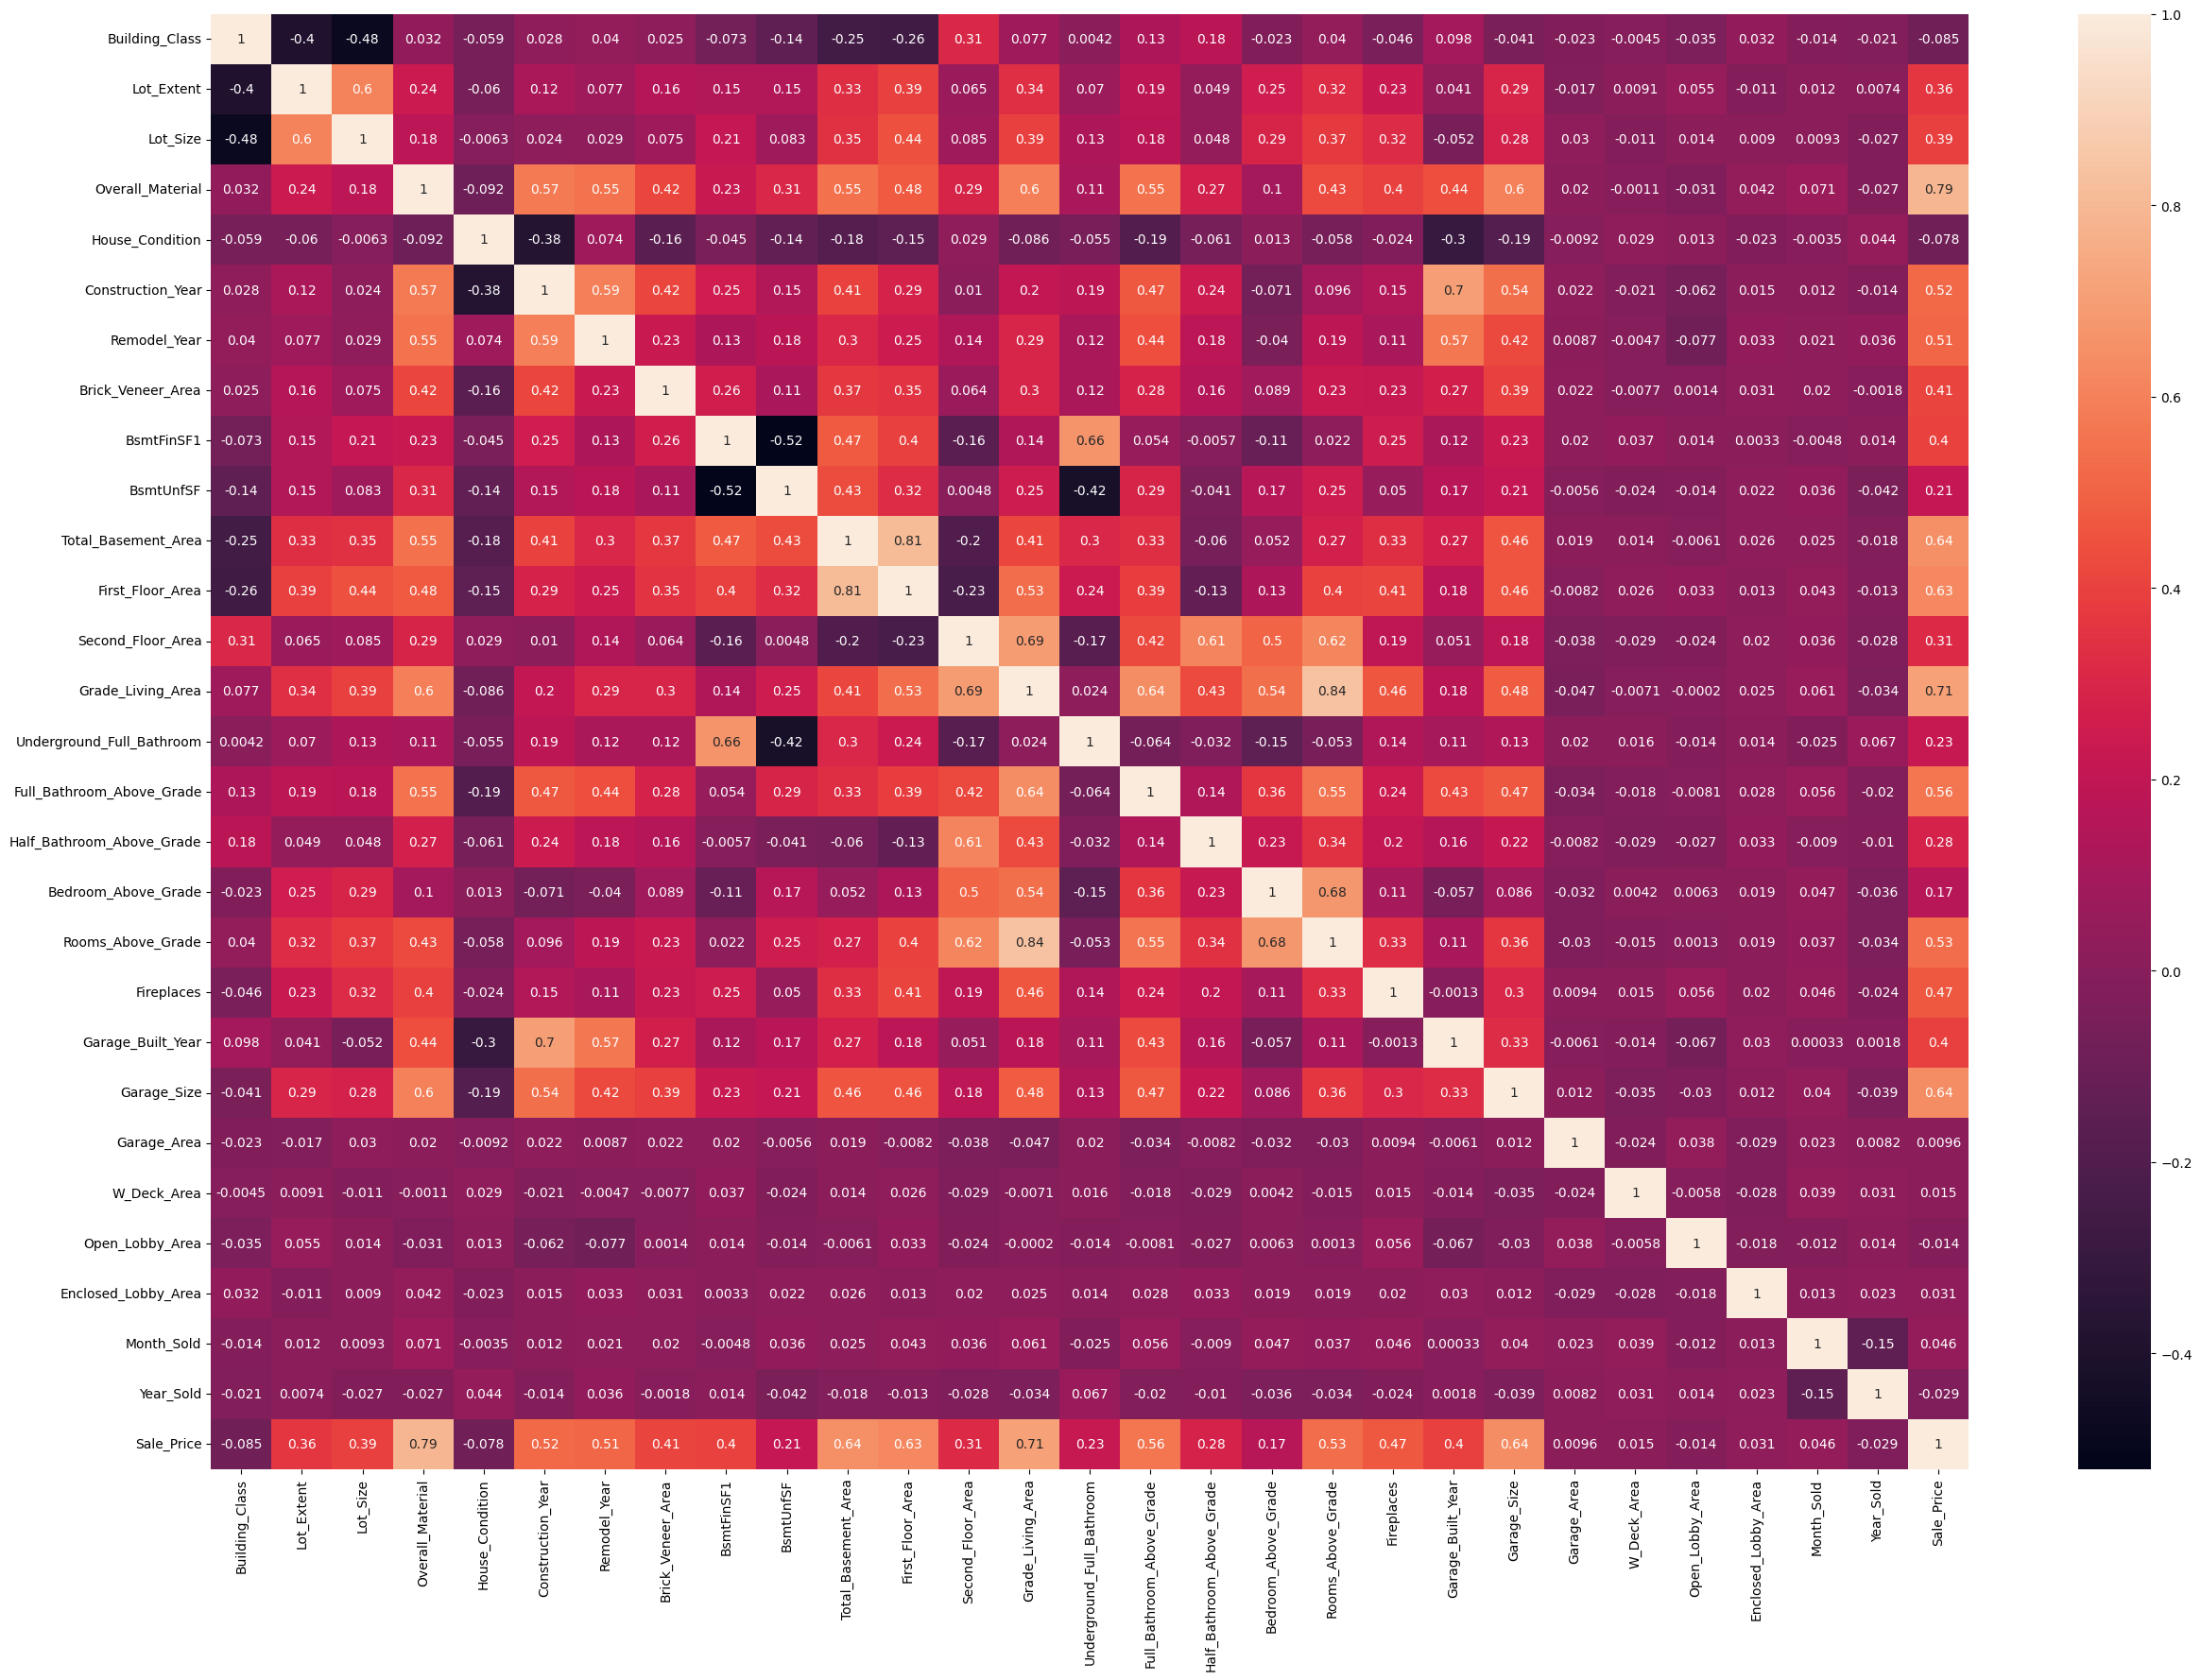

In [74]:
plt.figure(figsize=(30,20))
sns.heatmap(final_train.select_dtypes(exclude='O').corr(), annot=True);

In [75]:
final_train.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grad

In [76]:
# divide data into categorical and numerical features
cat, num = [], []
for i in final_train.columns:
    d = final_train.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']
Numerical:  ['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Full_Bathr

In [77]:
X = final_train[['Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Land_Outline', 'Neighborhood', 'Overall_Material', 
            'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Basement_Height', 'Basement_Condition', 'Exposure_Level',
      'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade', 'Fireplaces', 'Garage',
       'Garage_Built_Year', 'Garage_Finish_Year', 'Garage_Size', 'Sale_Condition']]
y = final_train['Sale_Price']

In [78]:
X.head()

Zoning_Class  Lot_Extent  Lot_Size Land_Outline Neighborhood  \
0          RLD        65.0  9.042040          Lvl      CollgCr   
1          RLD        80.0  9.169623          Lvl      Veenker   
2          RLD        68.0  9.328212          Lvl      CollgCr   
3          RLD        60.0  9.164401          Lvl      Crawfor   
4          RLD        84.0  9.565284          Lvl      NoRidge   

   Overall_Material  Construction_Year  Remodel_Year Brick_Veneer_Type  \
0                 7               2003          2003           BrkFace   
1                 6               1976          1976           BrkFace   
2                 7               2001          2002           BrkFace   
3                 7               1915          1970           BrkFace   
4                 8               2000          2000           BrkFace   

   Brick_Veneer_Area  ... Half_Bathroom_Above_Grade Bedroom_Above_Grade  \
0           5.283204  ...                         1                   3   
1           0.000000  ...                         0                   3   
2           5.093750  ...                         1                   3   
3           0.000000  ...                         0                   3   
4           5.860786  ...                         1                   4   

  Kitchen_Quality Rooms_Above_Grade  Fireplaces  Garage  Garage_Built_Year  \
0              Gd                 8           0  Attchd             2003.0   
1              TA                 6           1  Attchd             1976.0   
2              Gd                 6           1  Attchd             2001.0   
3              Gd                 7           1  Detchd             1998.0   
4              Gd                 9           1  Attchd             2000.0   

  Garage_Finish_Year  Garage_Size  Sale_Condition  
0                RFn            2          Normal  
1                RFn            2          Normal  
2                RFn            2          Normal  
3                Unf            3         Abnorml  
4                RFn            3          Normal  

[5 rows x 33 columns]

In [79]:
X['Age'] = 2021 - X['Construction_Year']
X['Years_After_Remodelling'] = 2021 - X['Remodel_Year']
X['Garage_Age'] = 2021 - X['Garage_Built_Year']

In [80]:
X.drop(['Construction_Year','Remodel_Year', 'Garage_Built_Year'],axis=1, inplace=True)

In [81]:
# divide data into categorical and numerical features
cat, num = [], []
for i in X.columns:
    d = X.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Land_Outline', 'Neighborhood', 'Brick_Veneer_Type', 'Exterior_Material', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'Air_Conditioning', 'Kitchen_Quality', 'Garage', 'Garage_Finish_Year', 'Sale_Condition']
Numerical:  ['Lot_Extent', 'Lot_Size', 'Overall_Material', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces', 'Garage_Size', 'Age', 'Years_After_Remodelling', 'Garage_Age']


In [82]:
pvalue = []
pearson_coeff = []

In [83]:
for i in num:
    pearson_coef, p_value = stats.pearsonr(X[i], y)
    pearson_coeff.append(pearson_coef)
    pvalue.append(p_value)

In [84]:
col = pd.DataFrame({'Features':X[num].columns, 'P_Value':pvalue,'Pearson_Coeff':pearson_coeff})

In [85]:
col.sort_values(by='P_Value')

Features        P_Value  Pearson_Coeff
2            Overall_Material  3.684768e-313       0.790972
9           Grade_Living_Area  2.253243e-227       0.713515
6         Total_Basement_Area  8.185483e-172       0.644163
16                Garage_Size  3.390581e-169       0.640383
7            First_Floor_Area  6.463181e-159       0.625003
11  Full_Bathroom_Above_Grade  1.603930e-121       0.560604
14          Rooms_Above_Grade  3.428969e-108       0.533682
17                        Age  3.585317e-103      -0.522877
18    Years_After_Remodelling   4.001509e-96      -0.507015
15                 Fireplaces   7.588839e-80       0.466828
3           Brick_Veneer_Area   9.883971e-61       0.411539
4                  BsmtFinSF1   1.486081e-57       0.401260
19                 Garage_Age   1.792668e-56      -0.397678
1                    Lot_Size   1.005794e-54       0.391788
0                  Lot_Extent   4.333834e-46       0.360798
8           Second_Floor_Area   2.474504e-34       0.312126
12  Half_Bathroom_Above_Grade   1.360717e-28       0.284626
10  Underground_Full_Bathroom   1.368324e-18       0.227551
5                   BsmtUnfSF   5.084267e-16       0.210113
13        Bedroom_Above_Grade   9.922143e-11       0.168272

# Feature Elimination using Chi2 techniques

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X[num],y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X[num].columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Features','Scores']
featureScores.sort_values(by='Scores',ascending=False)

Features         Scores
8           Second_Floor_Area  457343.682073
4                  BsmtFinSF1  389757.108382
5                   BsmtUnfSF  267101.672230
9           Grade_Living_Area  178036.427290
6         Total_Basement_Area  164718.187217
7            First_Floor_Area  115826.232317
17                        Age   17594.017543
19                 Garage_Age   12154.198255
18    Years_After_Remodelling   10368.335594
0                  Lot_Extent    4111.116299
3           Brick_Veneer_Area    2552.559411
15                 Fireplaces     569.503500
12  Half_Bathroom_Above_Grade     520.284027
10  Underground_Full_Bathroom     447.962212
2            Overall_Material     377.832688
14          Rooms_Above_Grade     359.939730
16                Garage_Size     324.124810
11  Full_Bathroom_Above_Grade     194.955847
13        Bedroom_Above_Grade     171.585991
1                    Lot_Size      20.055687

In [87]:
XMod1 = X[['Lot_Size','Bedroom_Above_Grade','Garage_Size','Overall_Material',
             'Second_Floor_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Brick_Veneer_Area',                         
             'Grade_Living_Area', 'Total_Basement_Area','First_Floor_Area', 
             'Age','Garage_Age', 'Years_After_Remodelling', 'Lot_Extent']]

In [88]:
dummies = pd.get_dummies(X[['Zoning_Class','Exterior_Material', 'Exposure_Level', 'Kitchen_Quality', 'Sale_Condition']], drop_first=True)

In [89]:
X_fin=XMod1.join(dummies)

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.2,random_state=14)

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_fin)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [92]:
X_train= pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test= pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [93]:
lm=LinearRegression()

In [94]:
scores=cross_val_score(lm,X_fin,y,cv=10,scoring='neg_mean_squared_error',verbose=3)

[CV] END ....................... score: (test=-576363759.957) total time=   0.0s
[CV] END ....................... score: (test=-682813880.771) total time=   0.0s
[CV] END ....................... score: (test=-478538822.017) total time=   0.0s
[CV] END ...................... score: (test=-2373943220.158) total time=   0.0s
[CV] END ...................... score: (test=-1424658427.018) total time=   0.0s
[CV] END ....................... score: (test=-718053216.211) total time=   0.0s
[CV] END ....................... score: (test=-768174825.387) total time=   0.0s
[CV] END ....................... score: (test=-707397111.770) total time=   0.0s
[CV] END ...................... score: (test=-2438936298.040) total time=   0.0s
[CV] END ....................... score: (test=-563808165.335) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [95]:
for i,score in enumerate(scores):
    print(f'RMSE : {i}{np.sqrt(-1*score)}')
print('Overall RMSE:',np.sqrt(-1*np.mean(scores)))

RMSE : 024007.577136323867
RMSE : 126130.707620943303
RMSE : 221875.530211106106
RMSE : 348723.12818526901
RMSE : 437744.64766053348
RMSE : 526796.515001226304
RMSE : 627715.966975494768
RMSE : 726596.93801493768
RMSE : 849385.58795883912
RMSE : 923744.644982299455
Overall RMSE: 32760.78101429288


In [96]:
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [97]:
print('The R^2 value for the MLR model is',lm.score(X_test,y_test))

The R^2 value for the MLR model is 0.7948713278493005


In [98]:
print('Adjusted R^2 :', 1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R^2 : 0.7686339395509552


<Axes: xlabel='Sale_Price', ylabel='Density'>

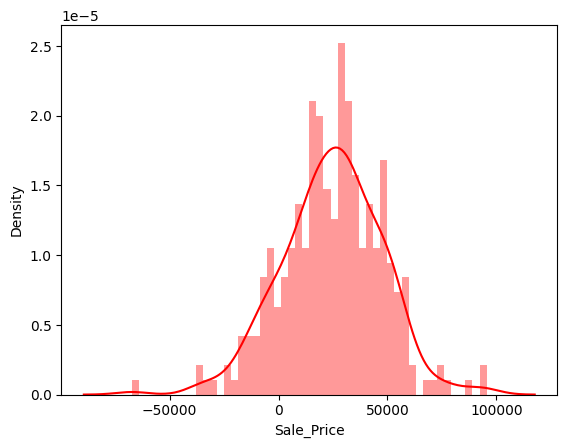

In [99]:
sns.distplot((y_test-predictions),bins=50,color='r')

In [100]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 28217.739321716926
MSE: 1126194318.6711776
RMSE: 33558.818791357626


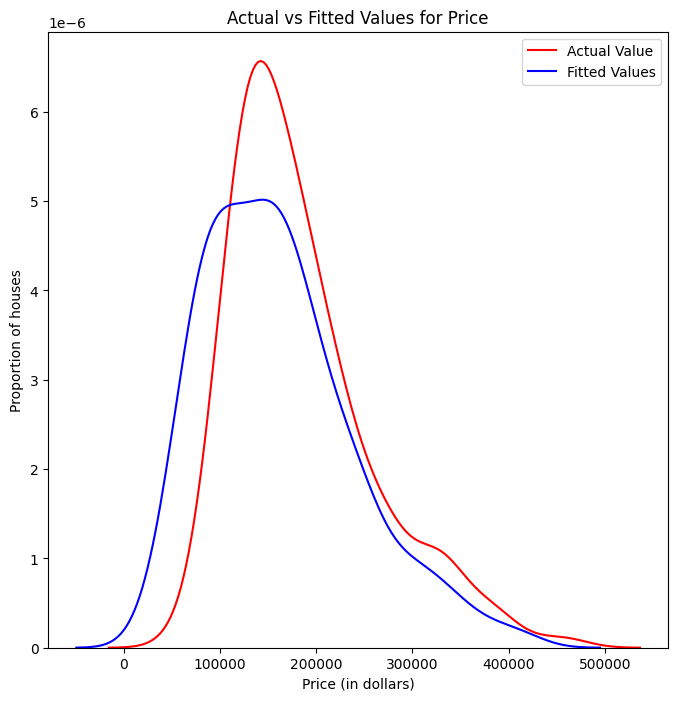

In [101]:
plt.figure(figsize=(8,8))
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Value")
sns.distplot(predictions,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')
plt.legend()
plt.show()
plt.close()

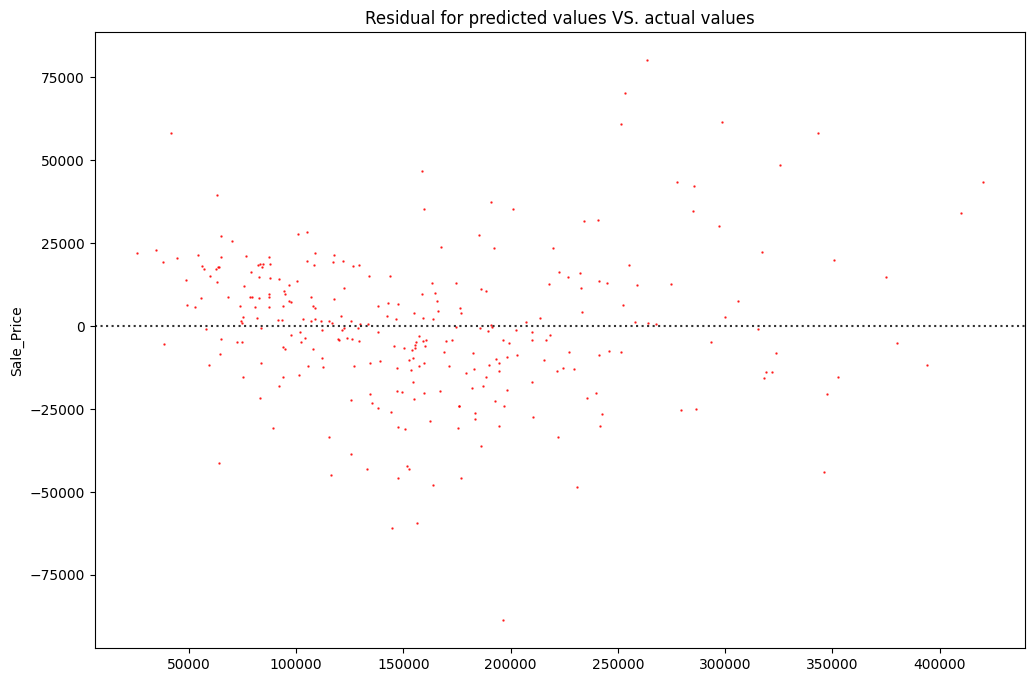

In [102]:
plt.figure(figsize=(12,8))
sns.residplot(x=predictions,y=y_test, color='r', scatter_kws={'s':0.5})
plt.title('Residual for predicted values VS. actual values')
plt.show()

### No trends or patterns observed in the residuals.

## The final R2 score of the MLR model is % with Adjusted R2 of % and RMSE:

In [103]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [104]:
params = {'n_estimators':[100,250,500,1000,2000], 'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3]}

In [112]:
grid = GridSearchCV(XGBRegressor(booster = 'gblinear'), params, refit = True, verbose = 3)

In [113]:
grid.fit(X_train, y_train, verbose=False,
              # To prevent overfitting 
              eval_set=[(X_train, y_train), (X_test, y_test)],
              eval_metric="rmse",
              early_stopping_rounds=100
              )

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.05, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.05, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.05, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.05, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.05, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.05, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.05, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.05, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.05, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.05, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.05, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.05, n_estimators=5

ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vs\mlenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vs\mlenv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'


In [116]:
grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'